<a href="https://colab.research.google.com/github/sinakhatibi/TrafficPrediction/blob/master/TrafficPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [0]:
import csv
import keras
import matplotlib.pyplot as plt
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [0]:
import numpy as np
np.random.seed(7)

# Generate Traffic


In [0]:
win_size_min = 5
max_time_size = int(24*60 /win_size_min)
time = np.linspace(0, 24*60, max_time_size)

lamda_max = 50
lamda_min = 5
lamda_step = lamda_max/(12*60)
lamda = np.zeros(max_time_size)

for i in range(max_time_size):
    lamda[i] = lamda_max  - ((lamda_max - lamda_min)/lamda_max) * abs(lamda_max - lamda_step * time[i]);

demand = np.zeros(max_time_size)
for i in range(max_time_size):
    demand[i] = np.mean(np.random.poisson(lamda[i],100*win_size_min));



# CSV_inputs = np.empty(shape=(0, 2), dtype=float)
# csv_time = np.empty(shape=(0, 1), dtype=float)
# csv_demand = np.empty(shape=(0, 1), dtype=float)
# with open('traffic.csv') as csvfile:
#     readCSV = csv.reader(csvfile, delimiter=',')
#     size = 0
#     for row in readCSV:
#         size += 1
#         time = float(row[0])
#         demand = float(row[1])
#         CSV_inputs = np.append(CSV_inputs, np.array([[time, demand]]), axis=0)
#         csv_time = np.append(csv_time, np.array([[time]]), axis=0)
#         csv_demand = np.append(csv_demand, np.array([[demand]]), axis=0)

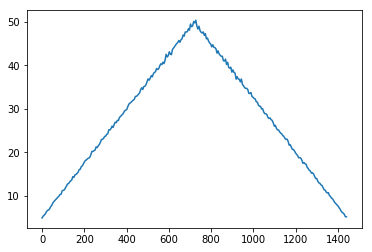

In [0]:
plt.plot(time,demand)
plt.show()

In [0]:
# normalise the data
norm_fator_demand_mean = np.mean(demand)
norm_fator_demand_std = np.max(demand )
demand = (demand)/norm_fator_demand_std

# Making the Input Vector

In [0]:
window_size = 5
size = max_time_size
#making input vector

input_vector = np.empty(shape=(0, window_size), dtype=float)
for i in range(size):
    tmp = []
    for j in range(window_size):
        k = i - j-1 if i-j > 0 else size+i-j-2;
        tmp = np.append(tmp, demand[k])
    input_vector = np.append(input_vector,np.array([tmp]),axis=0)

input_vector = input_vector

In [0]:
from keras import models
from keras import layers

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(window_size,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

W0614 10:05:52.923373 140311358314368 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0614 10:05:52.987203 140311358314368 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0614 10:05:52.996776 140311358314368 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                96        
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

W0614 10:05:56.215739 140311358314368 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
# from keras import losses
# from keras import metrics

# model.compile(optimizer='adam',
#               loss=losses.mean_squared_error,
#               metrics=[metrics.binary_accuracy])

In [0]:
tr_size = int(np.floor(.1 * size))

x_train = input_vector[:-tr_size,:]
y_train = demand[:-tr_size]

x_val = input_vector[:tr_size]
y_val = demand[:tr_size]

In [0]:
history = model.fit(x_train,
                    y_train,
                    epochs=100,
                    batch_size=1,
                    validation_data=(x_val, y_val))

W0614 10:06:02.588526 140311358314368 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0614 10:06:02.667126 140311358314368 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 260 samples, validate on 28 samples
Epoch 1/100
260/260 [==============================] - 1s 4ms/step - loss: 0.0569 - acc: 0.0038 - val_loss: 0.1082 - val_acc: 0.0000e+00
Epoch 2/100
260/260 [==============================] - 0s 1ms/step - loss: 0.0311 - acc: 0.0038 - val_loss: 0.0509 - val_acc: 0.0000e+00
Epoch 3/100
260/260 [==============================] - 0s 1ms/step - loss: 0.0099 - acc: 0.0038 - val_loss: 0.0069 - val_acc: 0.0000e+00
Epoch 4/100
260/260 [==============================] - 0s 1ms/step - loss: 0.0021 - acc: 0.0038 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 5/100
260/260 [==============================] - 0s 1ms/step - loss: 0.0011 - acc: 0.0038 - val_loss: 6.8535e-04 - val_acc: 0.0000e+00
Epoch 6/100
260/260 [==============================] - 0s 1ms/step - loss: 9.9579e-04 - acc: 0.0038 - val_loss: 6.1267e-04 - val_acc: 0.0000e+00
Epoch 7/100
260/260 [==============================] - 0s 1ms/step - loss: 9.7870e-04 - acc: 0.0038 - val_loss: 6.3300e-0

In [0]:
predict = model.predict(input_vector)

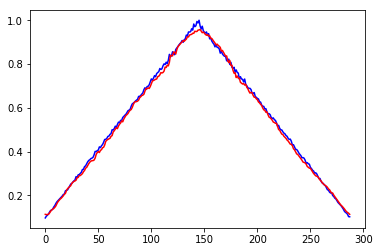

In [15]:

plt.plot(demand, 'b')
plt.plot(predict, 'r')
plt.show()